In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import logging

import matplotlib.pyplot as plt
import numpy as np

import yass
from yass import preprocess
from yass import process
from yass import deconvolution

In [3]:
# configure logging module to get useful information
logging.basicConfig(level=logging.DEBUG)

# set yass configuration parameters
yass.set_config('../config/nnet100k.yaml')

cfg = yass.read_config()

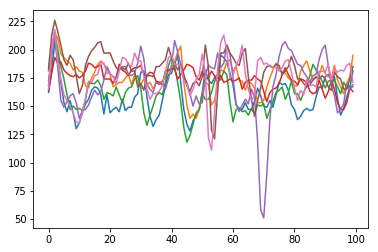

In [4]:
raw = np.fromfile(os.path.join(cfg.root, 'tmp/sample_100k.bin'),
                   dtype='int16').reshape((100000, 7))
for s in raw.T:
    plt.plot(s[:100])

plt.show()

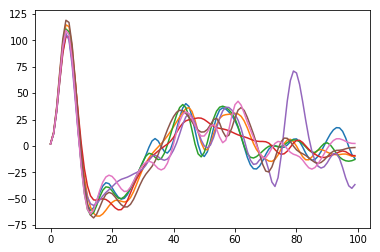

In [5]:
filtered = np.fromfile(os.path.join(cfg.root, 'tmp/filtered.bin'),
                   dtype='float').reshape((100000, 7))
for s in filtered.T:
    plt.plot(s[:100])

plt.show()

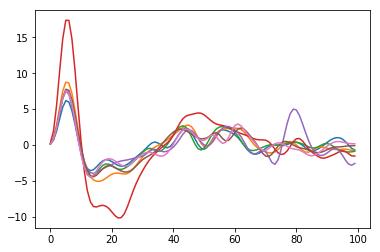

In [6]:
standarized = np.fromfile(os.path.join(cfg.root, 'tmp/standarized.bin'),
                   dtype='float').reshape((100000, 7))
for s in standarized.T:
    plt.plot(s[:100])

plt.show()

# Preprocessor

In [7]:
# run preprocessor
score, clr_idx, spt = preprocess.run()

INFO:yass.batch.batch:Number of batches: 1. Batch size: 100000 (observations  per channel. Residual: 0. Total number of observations 100000
INFO:yass.preprocess.run:Initialized butterworth batch processor: BatchProcessor for file /users/Edu/data/yass/sample_100k.bin (1400000 bytes). Already processed 0 out of 1 batches. Max memory: 1000000000 bytes
DEBUG:yass.batch.batch:Loading batch 1...
DEBUG:yass.batch.batch:Closing file...
INFO:yass.batch.batch:Number of batches: 1. Batch size: 100000 (observations  per channel. Residual: 0. Total number of observations 100000
DEBUG:yass.batch.batch:Loading batch 1...
INFO:yass.batch.batch:Number of batches: 1. Batch size: 100000 (observations  per channel. Residual: 0. Total number of observations 100000
INFO:yass.preprocess.run:Initialized standarization batch processor: BatchProcessor for file /users/Edu/data/yass/tmp/filtered.bin (5600000 bytes). Already processed 0 out of 1 batches. Max memory: 1000000000 bytes
DEBUG:yass.batch.batch:Loading 

INFO:tensorflow:Restoring parameters from /users/Edu/data/yass/ae_31.ckpt


INFO:tensorflow:Restoring parameters from /users/Edu/data/yass/ae_31.ckpt


INFO:tensorflow:Restoring parameters from /users/Edu/data/yass/detectnet1.ckpt


INFO:tensorflow:Restoring parameters from /users/Edu/data/yass/detectnet1.ckpt


INFO:tensorflow:Restoring parameters from /users/Edu/data/yass/ae_31.ckpt


INFO:tensorflow:Restoring parameters from /users/Edu/data/yass/ae_31.ckpt


[[    71      2      1]
 [    71      3      1]
 [   121      4      1]
 ..., 
 [100047      2      1]
 [100048      5      1]
 [100049      3      1]]
INFO:tensorflow:Restoring parameters from /users/Edu/data/yass/triagenet1.ckpt


INFO:tensorflow:Restoring parameters from /users/Edu/data/yass/triagenet1.ckpt


INFO:tensorflow:Restoring parameters from /users/Edu/data/yass/triagenet1.ckpt


INFO:tensorflow:Restoring parameters from /users/Edu/data/yass/triagenet1.ckpt


INFO:tensorflow:Restoring parameters from /users/Edu/data/yass/triagenet1.ckpt


INFO:tensorflow:Restoring parameters from /users/Edu/data/yass/triagenet1.ckpt


INFO:tensorflow:Restoring parameters from /users/Edu/data/yass/triagenet1.ckpt


INFO:tensorflow:Restoring parameters from /users/Edu/data/yass/triagenet1.ckpt


INFO:tensorflow:Restoring parameters from /users/Edu/data/yass/triagenet1.ckpt


INFO:tensorflow:Restoring parameters from /users/Edu/data/yass/triagenet1.ckpt


INFO:tensorflow:Restoring parameters from /users/Edu/data/yass/triagenet1.ckpt


INFO:tensorflow:Restoring parameters from /users/Edu/data/yass/triagenet1.ckpt


INFO:tensorflow:Restoring parameters from /users/Edu/data/yass/triagenet1.ckpt


INFO:tensorflow:Restoring parameters from /users/Edu/data/yass/triagenet1.ckpt
DEBUG:yass.batch.batch:Closing file...
INFO:yass.preprocess.run:Preprocessing done in 2 seconds.
INFO:yass.preprocess.run:	reading data:	0 seconds
INFO:yass.preprocess.run:	filtering:	0 seconds
INFO:yass.preprocess.run:	standardization:	0 seconds
INFO:yass.preprocess.run:	detection:	1.191207 seconds
INFO:yass.preprocess.run:	whitening:	0.023859 seconds
INFO:yass.preprocess.run:	saving recording:	0.002051 seconds
INFO:yass.preprocess.run:	getting waveforms:	0.741648 seconds


In [8]:
[s.shape for s in score]

[(24, 3, 7),
 (72, 3, 4),
 (14, 3, 4),
 (19, 3, 4),
 (140, 3, 4),
 (110, 3, 4),
 (164, 3, 4)]

In [9]:
[c.shape for c in clr_idx]

[(24,), (72,), (14,), (19,), (140,), (110,), (164,)]

In [10]:
clr_idx[0]

array([ 15,  24,  29,  31,  39,  64, 104, 105, 110, 111, 119, 123, 144,
       158, 163, 175, 177, 182, 222, 252, 265, 290, 305, 307])

In [11]:
[s.shape for s in spt]

[(309, 2), (1445, 2), (894, 2), (945, 2), (1258, 2), (975, 2), (950, 2)]

In [52]:
spt[0][24]

array([6952,    0], dtype=int32)

# Processor

In [104]:
# run processor
spike_train, spt_left, templates = process.run(score, clr_idx, spt)

INFO:yass.process.run:Triaging...
INFO:yass.process.run:Coresettting...
INFO:yass.process.run:Masking...
INFO:yass.process.run:Clustering...
100% (1 of 1) |###########################| Elapsed Time: 0:00:00 Time: 0:00:00
INFO:yass.process.run:Getting Templates...
100% (1 of 1) |###########################| Elapsed Time: 0:00:00 Time: 0:00:00
INFO:yass.process.run:Mainprocess done in 0 seconds.
INFO:yass.process.run:	triage:	0.005126 seconds
INFO:yass.process.run:	coreset:	0.073937 seconds
INFO:yass.process.run:	masking:	0.004533 seconds
INFO:yass.process.run:	clustering:	0.34253 seconds
INFO:yass.process.run:	make templates:	0.037755 seconds


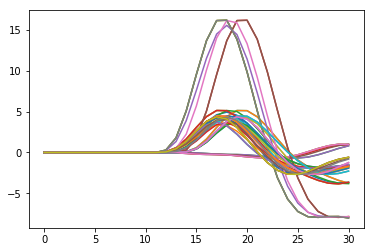

In [105]:
for t in templates:
    plt.plot(t)

plt.show()

In [82]:
spike_train.shape

(442, 2)

In [83]:
[s.shape for s in spt_left]

[(297, 2), (1381, 2), (887, 2), (932, 2), (1140, 2), (885, 2), (812, 2)]

In [84]:
templates.shape

(7, 31, 1)

In [60]:
from yass.mainprocess import Mainprocessor
mp = Mainprocessor(cfg, score, clr_idx, spt)
_, _ = mp.mainProcess()

INFO:yass.mainprocess:Triaging...
INFO:yass.mainprocess:Coresettting...
INFO:yass.mainprocess:Masking...
INFO:yass.mainprocess:Clustering...
100% (1 of 1) |###########################| Elapsed Time: 0:00:00 Time: 0:00:00
INFO:yass.mainprocess:Getting Templates...
100% (1 of 1) |###########################| Elapsed Time: 0:00:00 Time: 0:00:00
INFO:yass.mainprocess:Mainprocess done in 0 seconds.
INFO:yass.mainprocess:	triage:	0.005216 seconds
INFO:yass.mainprocess:	coreset:	0.076479 seconds
INFO:yass.mainprocess:	masking:	0.004488 seconds
INFO:yass.mainprocess:	clustering:	0.284797 seconds
INFO:yass.mainprocess:	make templates:	0.022298 seconds


In [85]:
d = deconvolution.Deconvolution(cfg,
                                np.transpose(templates,[1,0,2]), spt_left)

In [86]:
spike_times_col = d.fullMPMU()

DEBUG:yass.deconvolution:wfile is /users/Edu/data/yass/tmp/wrec.bin 1401680
100% (1 of 1) |###########################| Elapsed Time: 0:00:00 Time: 0:00:00


Deconvoltuion done in 0 seconds.


In [87]:
spike_times_col.shape

(9, 2)

In [64]:
whiten = np.fromfile(os.path.join(cfg.root, 'tmp/whiten.bin'),
                   dtype='int16')
whiten = whiten.reshape((100120, 7))

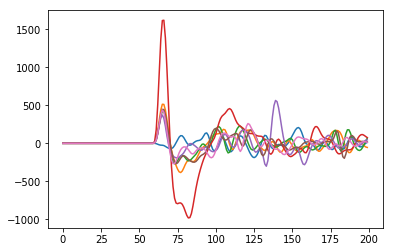

In [65]:
for t in whiten.T:
    plt.plot(t[:200])

plt.show()

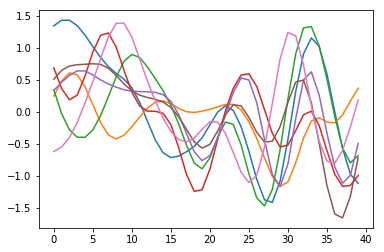

In [30]:
standarized = np.fromfile(os.path.join(cfg.root, 'tmp/standarized.bin'),
                   dtype='float').reshape((100000, 7))

for s in standarized.T:
    plt.plot(s[53203-20:53203+20])

plt.show()

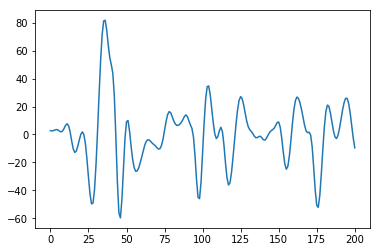

In [54]:
plt.plot(filtered[6952-100-1:6952+100,0])
plt.show()